# Example Python code to create a map of Europe with points on it

### Free Open Source
The code makes use of open source Python software (Matplotlib and Basemap, numpy etc).

### A few explanations:
In Python, putting a # before a line turns it into a comment. Comment out any line that you do not want
In this Notebook, Cells (or bits of code) can be executed by pressing SHIFT + ENTER

In [1]:
# Import packages

from mpl_toolkits.basemap import Basemap

from matplotlib import cm
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt

%matplotlib inline
import os
from IPython.display import FileLink, FileLinks

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3300: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3309: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


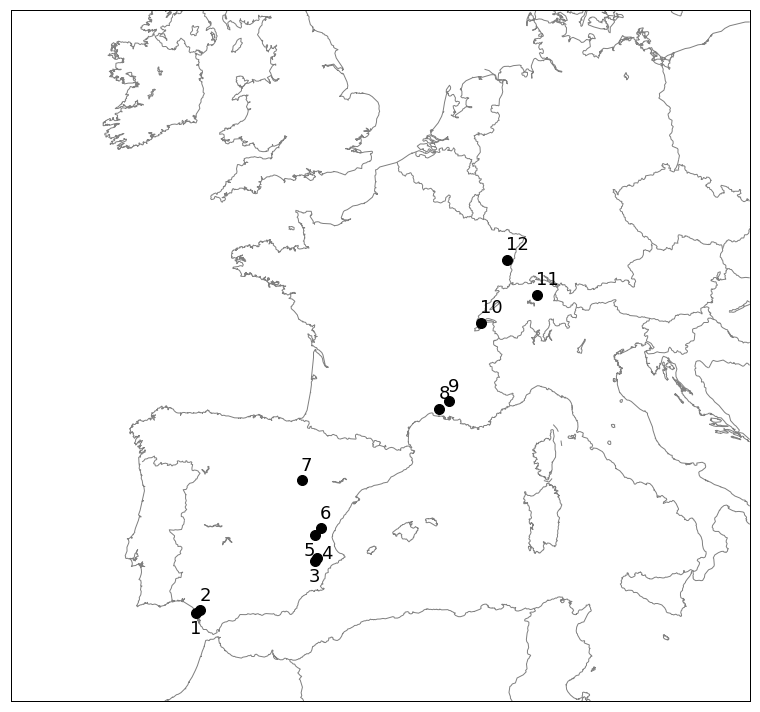

In [2]:
# create a figure and figure axes
fig, ax = plt.subplots(figsize = (15,10)) # <-- adapt the size here

# create a Basemap instance
# projection, string : possibilities include 'aeqd', 'laea' etc. For all possibilities and examples see: 
#    https://matplotlib.org/basemap/users/mapsetup.html
# lat_0, float : the latitude coordinate of the center of the map in WGS84
# lon_0, float : the longitude coordinate of the center of the map in WGS84
# resolution, string : the resolution of the map, either high (h) or low (l)
# llcrnrlon, float : the longitude coordinate of the lower left hand corner of the map
# llcrnrlat, float : the latitude coordinate of the lower left hand corner of the map
# urcrnrlon, float : the longitude coordinate of the upper right hand corner of the map
# urcrnrlat, float : the latitude coordinate of the upper right hand corner of the map

map = Basemap(projection='merc', lat_0 = 46.92366, lon_0 = 8.22313, resolution = 'i', ellps = 'WGS84',
             llcrnrlon = -14.567871, llcrnrlat = 33.564, urcrnrlon = 18.149414, urcrnrlat = 55.141210) 

# draw a line around the map region             
#map.drawmapboundary(fill_color='cadetblue') # <-- fill_color changes the color of the Sea. Names of colours
map.drawmapboundary(fill_color='white')                                           # can be found here: 
                                           # https://matplotlib.org/2.0.0/examples/color/named_colors.html

# draws the political boundaries
map.drawcountries(linewidth = 1.0, color = 'grey') # <-- the linewidth and the colour of the lines can be changed.
                                                # 'k' is black, 'r' is red, 'b' is blue etc

# draws the coastlines
map.drawcoastlines(linewidth = 1.0, color = 'grey')

# draw rivers
#map.drawrivers(linewidth = 1.0, color = 'aqua')

# colour the sea

# colour the land and the lakes
#map.fillcontinents(color='blanchedalmond',lake_color='cadetblue') # <-- change the colours here

# draws a relief map, looks nice :-) , sometimes it's better to choose between fillcontinents and shadedrelief or 
# bluemarble

#map.shadedrelief() # <-- draws mountains etc
#map.bluemarble() # <-- looks like Google Earth, but very dark

# draw meridians and parallels

#map.drawparallels(np.arange(10,90,20)) # <-- locations where to draw them. This means from 10 to 90 in steps of 20
#map.drawmeridians(np.arange(-180,180,30))

# This is the important part: putting points on the map

latp = [43.94834, 46.17086] # <-- latitude coordinates
lonp = [4.80892, 8.79953] # <-- longitude coordinates
labels = ['Avignon', 'Locarno'] # <-- place names

latp = [36.7785, 36.8768, 38.6152, 38.7200, 39.5100,39.7409,41.3584, 43.9400,43.6952,46.3992,47.2421,48.2900 ]
lonp = [-6.3429,-6.1681, -1.1046,-1.009, -1.0785,-0.8196, -1.6856, 4.8202, 4.4135, 6.2320, 8.7328, 7.4158]
labels = [1,2,3,4,5,6,7,9,8,10,11,12]



x,y = map(lonp, latp) # <-- transformation of the lat/lon coordinates to the map coordinates 
map.plot(x, y, 'ko', markerfacecolor = 'k', markersize=10) # <-- plotting the coordinates. Comment out this line 
                                                           # comment out this line if you don't want points
                                                           # 'ko' is a black circle marker, for types of markers see 
                                                           # https://matplotlib.org/api/markers_api.html
                                                           # the markerfacecolor sets the inside colour of the marker
# loop to add the labels to the points.               
for label, xpt, ypt in zip(labels, x, y):
    if label in [1,3]:
        plt.text(xpt-30000, ypt-100000, label, fontsize = 18, weight= 'normal')
    elif label == 5:
        plt.text(xpt-60000, ypt-100000, label, fontsize = 18, weight= 'normal')
    elif label == 4:
        plt.text(xpt+19000, ypt-5000, label, fontsize = 18, weight= 'normal')
    else:
        plt.text(xpt-5000, ypt+50000, label, fontsize = 18, weight= 'normal') # <-- xpt and ypt are the locations + some values
                                                           # to put the label above the point
                                                           # set fontsize and weight (i.e. bold) here

# Here you can add a square to the map

lat_r = [45.64841,47.95012,47.95012,45.64841, 45.64841] # <-- latitude coordinates of the corners of the square
lon_r = [5.66546,5.66546,10.88976,10.88976,5.66546] # <-- longitude coordinates of the corners of the square

x, y = map(lon_r, lat_r) # <-- transformation of the lat/lon coordinates to the map coordinates 
#map.plot(x,y, 'k--', linewidth =  2.5, dashes = [6,2]) # <-- plotting the coordinates. Comment out this line 
                                                       # if you don't want a square
    


plt.tight_layout()

# Save the figure

fig.savefig('./mapEuropeSmall2.png', dpi=200)

# Download your figure

In [3]:
# Press SHIFT + ENTER to execute this code, a list of links will appear. Your figure is saved under mapEuropeSmall.png or
# under another name if you specified a different name in the cell above. Clicking on the link will allow you to 
# download your image

FileLinks('.')

./
  environment.yml
  makeMap.ipynb
  mapEuropeSmall2.png
  README.rst
  makeMap-original.ipynb
  mapEuropeSmall.png
  README.md
./.git/
  index
  ORIG_HEAD
  config
  HEAD
  COMMIT_EDITMSG
  FETCH_HEAD
  description
./.git/hooks/
  prepare-commit-msg.sample
  commit-msg.sample
  applypatch-msg.sample
  pre-push.sample
  pre-applypatch.sample
  post-update.sample
  pre-rebase.sample
  pre-commit.sample
  update.sample
./.git/info/
  exclude
./.git/logs/
  HEAD
./.git/logs/refs/heads/
  master
./.git/logs/refs/remotes/origin/
  master
./.git/objects/0d/
  48e12b86cf2fcac8fcb410c40c7084c6018bec
./.git/objects/17/
  ef588a100718c1e594391717f36db0f332215a
./.git/objects/18/
  cf2b6f78d457d7bdcbcfee18eead7cb8208ffb
./.git/objects/1b/
  263110b47a53462723c3d936d0e87780c3e393
./.git/objects/1c/
  66176178e3733b291612324590d09f579e748a
./.git/objects/22/
  9797762c7ad35944b99f360a934dcf9c0de251
./.git/objects/2a/
  43fb29e07bc874419e69a7fd9375a7cc42eb8f
./.git/objects/2c/
  658f3c3ac0d4d6515e86fb27d6ffc5381c269a
./.git/objects/2e/
  a42f9b57c8f1cd50132a291e843a6803ef9e52
./.git/objects/3d/
  3e98bd32df93dd5e29c0a7a2789e8e32d96209
./.git/objects/3e/
  ed62a76a54a9b8b658a4674bb57c341aa2a1c1
./.git/objects/46/
  fde3a93ef5c9c331f894edcd1fe7f602775ee3
./.git/objects/4a/
  ac94964fc1465fd71c295f29b39e22af32d93d
./.git/objects/52/
  ae0ae7e7f30a92ecf9423c91326c1e1464a47f
./.git/objects/55/
  dff39fe0bd987f7312d24a8df9dd75a0c4d1ed
./.git/objects/5c/
  571b7c560b0fe9113ac21415c8c60b3d64a9da
  d212cb59c555c42222898ebbbab9018009906d
./.git/objects/5e/
  8fca1de5efa8bfbbc86931a922434f9a60a671
./.git/objects/67/
  f1bf0c5a850676f775807499e8249c0d8f2881
./.git/objects/70/
  c60974c35364963ac11f9f0c810c0eae57311c
./.git/objects/7c/
  f536f5a80703214fa202c5a57b4892ec48862f
./.git/objects/7d/
  a564d628c7727a0eb488c05171d0c18401bfa3
./.git/objects/80/
  a8c984601aa24c6938401255ce6a9e12756e36
./.git/objects/88/
  90eb34c272c1cbd89ef94361f1f837c1a426fa
./.git/objects/89/
  3fe207a4167ddc2b45251371daab33eba48548
./.git/objects/8e/
  9a0ff49b2a559289f37c623a91bd066cbf2734
./.git/objects/91/
  396747b1b19e498ec2c86d607b8599c20a3dab
./.git/objects/94/
  d3a10a16e5f4e0b927b67927f2a1e3cff48086
  56e8a6ffca2f2382bf8bea5e144507e90e84a1
./.git/objects/9e/
  5bb2f15fdc31d41bd72cbdb5e5b1e878437dd4
./.git/objects/a2/
  cc6cef0eaca25fc7e989817e24e49129507815
./.git/objects/aa/
  636c4bbefde1b6f5ac6f98515e9bda0a1aa154
./.git/objects/b2/
  e9edcaa48c5f5a9d26815a8bbe69776d6c5b25
  cdb071b2f36457de255bed6cfad8018354e351
./.git/objects/b8/
  3ddf21bbd2d4a6ab3f1d0ebf363b3b146daaf1
./.git/objects/bd/
  c5be23fcdfbd97987faa00d433e16fa9b4eb16
./.git/objects/c0/
  0f7851545a4025dfd851e61586fde50a7c6598
./.git/objects/c1/
  71b30639145b3b114c04c246e957f5c4085b22
./.git/objects/c2/
  ce36c327af86049201c34a5c10b6e7046a1a4d
./.git/objects/cd/
  141338fa591751329d6a0a05a266f489696197
  f4e56b38363ee52972b00bcccaf57d1198ccc3
./.git/objects/cf/
  eabe58597c29540d71a5da032c2422f1b68d1c
./.git/objects/d0/
  949dd968409950cf8cc74fd1f9d6711d545fb6
./.git/objects/db/
  c6513e2e62453d06c3f32c1821a4a94ecce5cd
  8b86be1ace7a30d0c48e091157953f42f1ca85
./.git/objects/e0/
  4eb7c5892c44309eb32085a7831287fe73c4f6
./.git/objects/e1/
  fc36598717b2c8fa9e44fa24b17de7db3b6dd0
./.git/objects/e2/
  f964951c65caf6f20b36e400114ee8c16962e9
./.git/objects/e5/
  028f51bc580497688039723e56eecbff981bf5
./.git/objects/e7/
  da4d7e1671e9485603fa49eeaea294d0badeda
./.git/objects/e9/
  3d275e4e869a6e6206dd7244fb3d12624f70ed
./.git/objects/ed/
  deb31153313299000c3edf67f857841c258d7f
./.git/objects/f4/
  17218e7d9d8a721f97778d820cfaad4ee2f0ca
./.git/refs/heads/
  master
./.git/refs/remotes/origin/
  master
./.ipynb_checkpoints/
  makeMap-checkpoint.ipynb
  makeMap-original-checkpoint.ipynb